# K-Means Clustering Example

Let's make some fake data that includes people clustered by income and age, randomly:

In [14]:
from numpy import random, array

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    #print(pointsPerCluster)
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    X = array(X)
    #print(X)
    return X

We'll use k-means to rediscover these clusters in unsupervised learning:

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


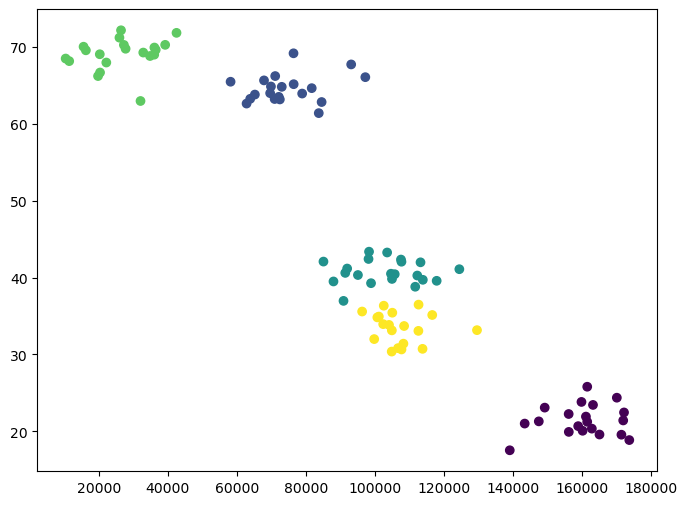

In [20]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random

data = createClusteredData(100, 5)

model = KMeans(n_clusters=5)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

## Activity

Things to play with: what happens if you don't scale the data? What happens if you choose different values of K? In the real world, you won't know the "right" value of K to start with - you'll need to converge on it yourself.